# Exploration of original cases

In this notebook we explore the characteristics of the original artificial cases datasets. We aim to answer the following questions:
- How many cases are there?
- How long are they?
- How many unique tokens are there?
- Are all of they structured in the same way?

We also have some metadata about the cases containing the MeSH terms in it. We will explore the distribution of these terms in the cases.

In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt

main_path = "data/1_original/txt"

In [3]:
filename = os.path.join(main_path, "25350173.txt")
content = open(filename, "r").read()

content

'A 64-year-old female lifelong smoker with no previous cardiac history presented with a 4-day history of dyspnoea on minimal exertion (New York Heart Association class III). Electrocardiography showed broad complex monophasic ventricular tachycardia (VT) and troponin T was elevated. She was treated initially with intravenous amiodarone and adenosine with no sustained effect.\n\nTransthoracic echocardiography showed a severely dilated left ventricle (LV) with a large aneurysm and severely impaired ventricular function. The ejection fraction was less than 10%. Coronary angiography showed a long segment of moderate to severe disease in the left coronary system and a small right coronary artery with no flow limiting disease. Recurrent intermittent episodes of VT became persistent and intractable. Direct current cardioversion was attempted on at least 20 separate occasions, resulting in only transient amelioration of arrhythmia. Percutaneous coronary intervention was undertaken successfully

In [4]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Data Exploration

## Amount of data

In [5]:
n_cc = len(os.listdir(main_path))
print("There are {} clinical cases".format(n_cc))

There are 1000 clinical cases


In [6]:
def extract_txt(path, filename):
    total_path = os.path.join(path, filename)
    return filename, open(total_path, "r", encoding="utf8").read()

filename = "25350173.txt"

def files_to_df(path, extensions=["txt"]):
    files = [x for x in os.listdir(path) if x.split(".")[-1] in extensions]
    data = [extract_txt(path, f) for f in files]
    return pd.DataFrame(data, columns=["filename", "text"])

df = files_to_df(main_path)

In [7]:
df.head()

,filename,text
0,25350173.txt,A 64-year-old female lifelong smoker with no p...
1,25531204.txt,A 28-year-old man presented to the Emergency D...
2,25654384.txt,A 64-year-old female patient with a history of...
3,25679083.txt,Josephine was a 70-year-old white woman measur...
4,25725033.txt,An 85-year-old woman reported sudden onset dys...


In [8]:
# Include the number of RoBERTa tokens
from transformers import GPT2TokenizerFast

tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

c:\Users\alber\Documents\GitHub\MultiSynDS\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [9]:
df["n_char"] = df["text"].str.len()
df["n_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x))).astype(int)
df["n_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x))).astype(int)
df["n_tokens"] = df["text"].apply(lambda x: len(tokenizer(x)["input_ids"]))
df.head()

Token indices sequence length is longer than the specified maximum sequence length for this model (1052 > 1024). Running this sequence through the model will result in indexing errors


,filename,text,n_char,n_words,n_sentences,n_tokens
0,25350173.txt,A 64-year-old female lifelong smoker with no p...,1932,295,16,419
1,25531204.txt,A 28-year-old man presented to the Emergency D...,3174,573,24,849
2,25654384.txt,A 64-year-old female patient with a history of...,3714,622,20,897
3,25679083.txt,Josephine was a 70-year-old white woman measur...,4772,821,29,1052
4,25725033.txt,An 85-year-old woman reported sudden onset dys...,1915,335,17,492


In [10]:
df.sort_values(by=["n_words", "n_sentences"], ascending=True).head()

,filename,text,n_char,n_words,n_sentences,n_tokens
261,31326486_2.txt,A 52-year-old diabetic woman with a non-ST-seg...,445,76,5,117
11,26512038.txt,We present a case of a 34-year-old man with ac...,511,82,6,137
133,30180978_2.txt,A similar case of postpartum cardiomyopathy in...,573,87,6,134
49,29437819.txt,A 67-year-old man with a history of non-ischae...,616,101,4,149
38,28960929_2.txt,"A 65‐year‐old man, apparently healthy, was adm...",596,106,6,173


In [11]:
df.sort_values(by=["n_words", "n_sentences"], ascending=False).head()

,filename,text,n_char,n_words,n_sentences,n_tokens
187,30785587.txt,"A 51-year-old male, hypertensive patient, a fo...",14524,2649,84,3777
531,33544806.txt,Clinical history\n\nFour years before the admi...,12664,2206,91,3114
139,30226919.txt,The patient is a 60-year-old female with Chaga...,11508,2146,81,3062
269,31378248.txt,A 50-year-old man presented to his primary car...,12879,2135,83,2895
357,32111708.txt,"A 66-year-old multiparous, postmenopausal woma...",12251,2109,92,3011


<Axes: xlabel='n_words', ylabel='n_sentences'>

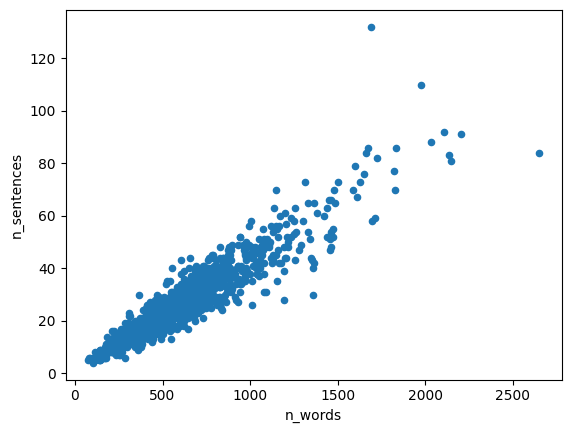

In [12]:
df.plot.scatter(x="n_words", y="n_sentences")

In [13]:
df.describe()

,n_char,n_words,n_sentences,n_tokens
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3731.179000,638.256000,28.116000,888.068000
std,1991.746719,342.448611,15.070955,482.138234
min,445.000000,76.000000,4.000000,117.000000
25%,2272.500000,385.000000,17.000000,546.500000
50%,3467.500000,594.000000,26.000000,827.500000
75%,4663.250000,793.250000,35.000000,1104.250000
max,14524.000000,2649.000000,132.000000,3777.000000


In [19]:
df_ds = pd.read_csv("nbs/data/en/ds_en_length.csv")
df_ds

,n_sentences,n_words,n_tokens
0,9,410,575
1,19,595,837
2,20,507,734
3,9,456,632
4,11,430,669
...,...,...,...
995,20,502,701
996,25,608,860
997,17,545,760
998,23,477,640


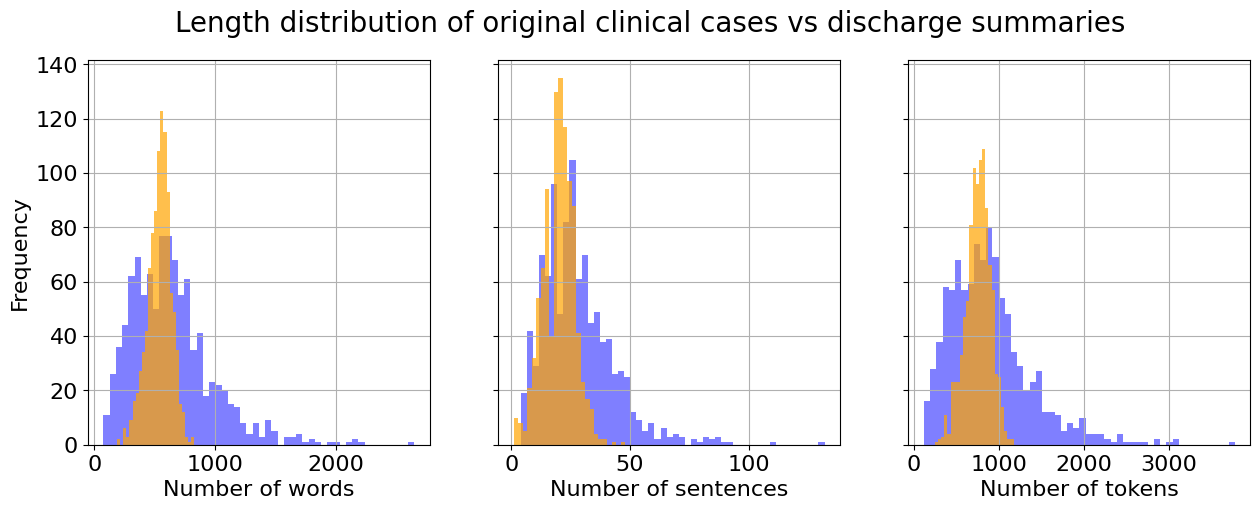

In [28]:
import matplotlib.pyplot as plt

labelsize = 16
titlesize = 20

fig, ax = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
df["n_words"].hist(bins=50, ax=ax[0], label="Original", color="blue", alpha=0.5)
df_ds["n_words"].hist(bins=25, ax=ax[0], alpha=0.7, label="DS", color="orange")
# df["n_sentences"].hist(bins=50, ax=ax[1])
df["n_sentences"].hist(bins=50, ax=ax[1], label="Original", color="blue", alpha=0.5)
df_ds["n_sentences"].hist(bins=25, ax=ax[1], alpha=0.7, label="DS", color="orange")

df["n_tokens"].hist(bins=50, ax=ax[2], label="Original", color="blue", alpha=0.5)
df_ds["n_tokens"].hist(bins=25, ax=ax[2], alpha=0.7, label="DS", color="orange")

ax[0].set_xlabel("Number of words", fontsize=labelsize)
ax[1].set_xlabel("Number of sentences", fontsize=labelsize)
ax[2].set_xlabel("Number of tokens", fontsize=labelsize)

ax[0].set_ylabel("Frequency", fontsize=labelsize)

ax[0].tick_params(axis='both', which='major', labelsize=labelsize)
ax[1].tick_params(axis='both', which='major', labelsize=labelsize)
ax[2].tick_params(axis='both', which='major', labelsize=labelsize)

fig.suptitle("Length distribution of original clinical cases vs discharge summaries", fontsize=titlesize)

fig.savefig("img/data_analysis/words_sentences.png")


In [34]:
print(df[["n_words", "n_sentences", "n_tokens"]].describe().to_markdown())

|       |   n_words |   n_sentences |   n_tokens |
|:------|----------:|--------------:|-----------:|
| count |  1000     |      1000     |   1000     |
| mean  |   638.256 |        28.116 |    888.068 |
| std   |   342.449 |        15.071 |    482.138 |
| min   |    76     |         4     |    117     |
| 25%   |   385     |        17     |    546.5   |
| 50%   |   594     |        26     |    827.5   |
| 75%   |   793.25  |        35     |   1104.25  |
| max   |  2649     |       132     |   3777     |


In [35]:
print(df_ds[["n_words", "n_sentences", "n_tokens"]].describe().to_markdown())

|       |   n_words |   n_sentences |   n_tokens |
|:------|----------:|--------------:|-----------:|
| count | 1000      |    1000       |   1000     |
| mean  |  539.579  |      19.907   |    752.914 |
| std   |   97.6045 |       6.55464 |    147.162 |
| min   |  189      |       1       |    243     |
| 25%   |  480      |      16       |    667     |
| 50%   |  548      |      20       |    762.5   |
| 75%   |  602      |      24       |    851.25  |
| max   |  829      |      48       |   1172     |


In [43]:
print(df[df["n_words"] < 500].text.values[0])

Patient: Male, 63-year-old


Final Diagnosis:
• Amyloid light-chain amyloidosis
• cardiac amyloidosis
• cardiomyopathy
• heart failure
• primary AL amyloidosis


Symptoms:
• Aphasia
• dyspnea
• heart failure
• thrombosis
• tongue mass

Clinical Procedure:
• Biopsy
• chemotherapy
• echocardiography

Patient was admitted for newly diagnosed heart failure with high levels of natriuretic peptides and chronically elevated troponin values. During standard treatment, he had experienced transitory aphasia without structural cerebral damage and recovered completely. ECG showed low voltage in the limb leads with a pseudoinfarction pattern in the precordial leads. That finding along with the patient’s clinical presentation (periorbital hematoma, thickened tongue, proteinuria below the nephrotic range, and a decreased glomerular filtration rate) and echo findings were highly suspicious for amyloidosis.

Spontaneous echo contrast was detected in the man’s heart cavities, possibly explaining his rec

In [56]:
example_1 = df[df["n_words"] < 300].iloc[101]
print(example_1.filename)
print(example_1.text)

30567249.txt
A 74-year-old man underwent primary percutaneous coronary intervention (pPCI) for a completely occluded proximal left anterior descending artery. During the procedure, microvascular flow distal to the block could not be established (no-reflow phenomenon) and thus was managed with diltiazem and nicorandil. A follow-up echocardiogram performed on the next day revealed an intraparietal echolucent apicolateral neocavitation corresponding to an intramyocardial haematoma (IMH) along with reduced ejection fraction (EF) of 30% as compared with 45% per intervention. At 1 month follow-up, he went into congestive heart failure with a further decline in EF to 25%. Although the IMH was resolving, left ventricular apex had ballooned out. At 3 months, he was rehospitalised with a storm of ventricular tachycardia and further deterioration in EF with an apical aneurysm, and finally passed away.




In [44]:
print(df[df["n_words"].between(600, 800)].text.values[0])

In November 1990, a 25‐year‐old male patient with terminal heart failure due to endomyocardial fibrosis following myocarditis underwent transplantation at our institution using the heterotopic transplant technique. The primary indication for this approach was pulmonary hypertension. The post‐operative course was uneventful.

The patient's clinical condition has been monitored in 3‐month intervals since then. The routinely conducted laboratory investigations comprised complete blood count, coagulation, liver and renal function panels, serological examinations, inflammatory parameters, and N‐terminal prohormone of brain natriuretic peptide (NT‐proBNP). Transthoracic echocardiograms were obtained every 6 months or if clinically indicated.

The patient was in stable condition at the most recent presentation and had no relevant impairment according to the New York Heart Association functional classification (NYHA I–II). During the assessment of the aerobic capacity, he was able to achieve a

In [45]:
print(df[df["n_words"].between(900, 1100)].text.values[0])

The patient was a 92-year-old man who had long been treated for chronic kidney disease with renal anemia, atrial fibrillation with a slow ventricular response, and chronic heart failure of unknown cause. He was admitted to a local hospital because of progressive shortness of breath and systemic edema. He was treated with intravenous diuretics, but the response to treatment was unsatisfactory. Moreover, his renal function progressively deteriorated as a consequence of the administration of high-dose diuretics. At that point, he was transferred to our hospital for further treatment.

On admission, his blood pressure was 98/48 mmHg, his heart rate was 44 beats/min, and his oxygen saturation was 96% (room air). Cardiac auscultation revealed bradycardia with an irregular rhythm, a prominent second heart sound with fixed splitting, and a Levine III/VI systolic regurgitant murmur in the fourth intercostal space. On inspection, he had severe leg edema extending from the foot to thigh level, pr

In [46]:
print(df[df["n_words"].between(1500, 5000)].text.values[-1])

A 50-year-old male with a medical history of hypertension, gastro-oesophageal reflux disease, gout, hypothyroidism and anxiety presented to the emergency department with a 4-month history of progressive New York Heart Association (NYHA) class IV heart failure symptoms including dyspnoea, orthopnoea and paroxysmal nocturnal dyspnoea. He had been previously well, but recovered from a viral prodrome the previous month. He was a lifetime non-smoker, non-alcohol consumer and no other illicit drug use. His family history included an unspecified cardiac septal defect. On examination, the patient was afebrile, appearing comfortable in no distress on 3 L of nasal cannula oxygen, with normal blood oxygen saturations, a blood pressure of 119/79 mm Hg, heart rate of 104 bpm and normal respiratory rate. He had normal S1 and prominent S2 heart sounds with an S3 gallop and his jugular venous pressure (JVP) was elevated to the level of his earlobes, with course crackles in his chest. His abdomen was s

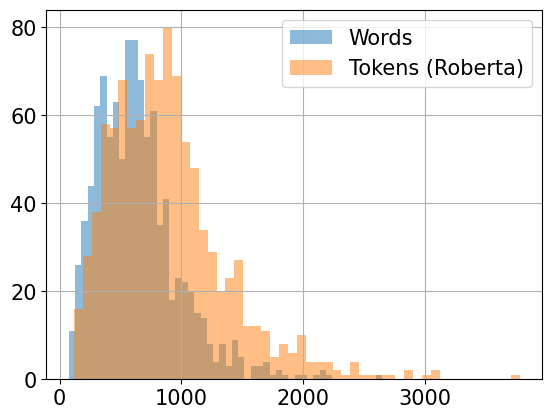

In [47]:
df["n_words"].hist(bins=50, alpha=0.5, label="Words");
df["n_tokens"].hist(bins=50, alpha=0.5, label="Tokens (Roberta)");
plt.legend();

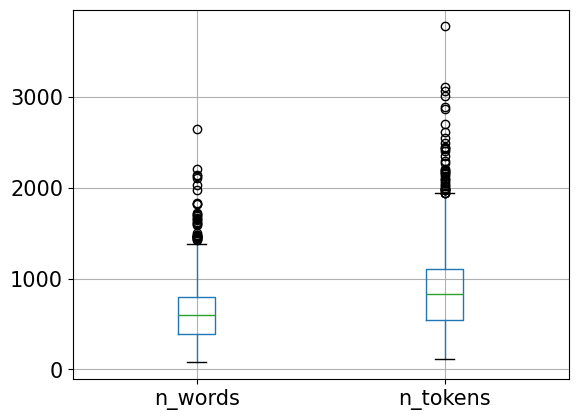

In [48]:
df.boxplot(column=["n_words", "n_tokens"]);

In [49]:
df.describe()

,n_char,n_words,n_sentences,n_tokens
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,3731.179000,638.256000,28.116000,888.068000
std,1991.746719,342.448611,15.070955,482.138234
min,445.000000,76.000000,4.000000,117.000000
25%,2272.500000,385.000000,17.000000,546.500000
50%,3467.500000,594.000000,26.000000,827.500000
75%,4663.250000,793.250000,35.000000,1104.250000
max,14524.000000,2649.000000,132.000000,3777.000000


In [50]:
long_docs = df[df["n_words"] > 1500]

for i, row in long_docs.iterrows():
    print(row["filename"])
    print(row["text"])
    print("\n\n")

29663722.txt
A 39‐year‐old man presented in 1998 with shortness of breath during exertion. Nine years earlier, in 1989, he was treated for myocarditis after an upper respiratory tract infection presumably due to a self‐limited virus infection. No test was performed then for any specific viruses. The echocardiogram (ECHO) showed a mildly reduced septal movement of the left ventricle. A year later, during follow‐up, a new ECHO showed an entirely ordinary function of the left ventricle, but the left ventricular wall was at the upper reference thickness limit. In the following 8 years, he did not have any heart problems. There was no family history of heart disease.

In 1998, the index patient experienced heart symptoms including breathlessness and therefore electrocardiography (ECG) and ECHO were performed. He had a regular sinus rhythm. Auscultation revealed a systolic murmur, heard best at the left parasternal region. The blood pressure was normal. The ECHO showed a thick interventricul

# Metadata exploration

In [5]:
metadata_path = "data/1_original/metadata"
df_meta = files_to_df(metadata_path)
df_meta["terms"] = df_meta["text"].str.split("\n")
df_meta = df_meta.explode("terms")
df_meta["terms"] = df_meta["terms"].str.replace("MH  - ", "")
df_meta.drop(columns="text", inplace=True)

print(f"Total number of MeSH terms: {df_meta.shape}")
print("\nTop 20 most frequent terms")
print(df_meta.terms.value_counts().sort_values(ascending=False).head(20).to_markdown())

Total number of MeSH terms: (10592, 2)

Top 20 most frequent terms
| terms                      |   count |
|:---------------------------|--------:|
| Humans                     |     996 |
| Male                       |     505 |
| Female                     |     413 |
| Middle Aged                |     298 |
| Aged                       |     257 |
| Adult                      |     227 |
| Treatment Outcome          |     216 |
| Echocardiography           |      99 |
| *Heart-Assist Devices      |      94 |
| *Heart Failure             |      89 |
| Stroke Volume              |      74 |
| Aged, 80 and over          |      71 |
| Diagnosis, Differential    |      63 |
| Fatal Outcome              |      61 |
| Electrocardiography        |      55 |
| Ventricular Function, Left |      50 |
| Pregnancy                  |      49 |
| *Heart Failure/etiology    |      45 |
| SARS-CoV-2                 |      45 |
| Acute Disease              |      44 |


In [6]:
age_mesh = ["Aged", "Middle Aged", "Young Adult", "Adult", "Aged, 80 and over", "Infant, Newborn", "Infant", "Child, Preschool", "Child", "Adolescent", "Young Adult", "Adult"]
human_mesh = ["Humans", "Male", "Female"]

df_meta_medic = df_meta[~df_meta["terms"].isin(age_mesh + human_mesh)]
df_meta_medic.head()

,filename,terms
0,33175723_1.txt,*Amyloidosis/diagnosis/diagnostic imaging
0,33175723_1.txt,*Cardiomyopathies/diagnostic imaging
0,33175723_1.txt,Diagnostic Imaging
0,33175723_1.txt,*Heart Failure/diagnostic imaging/etiology
0,33175723_1.txt,Prealbumin


## Medical MeSH terms

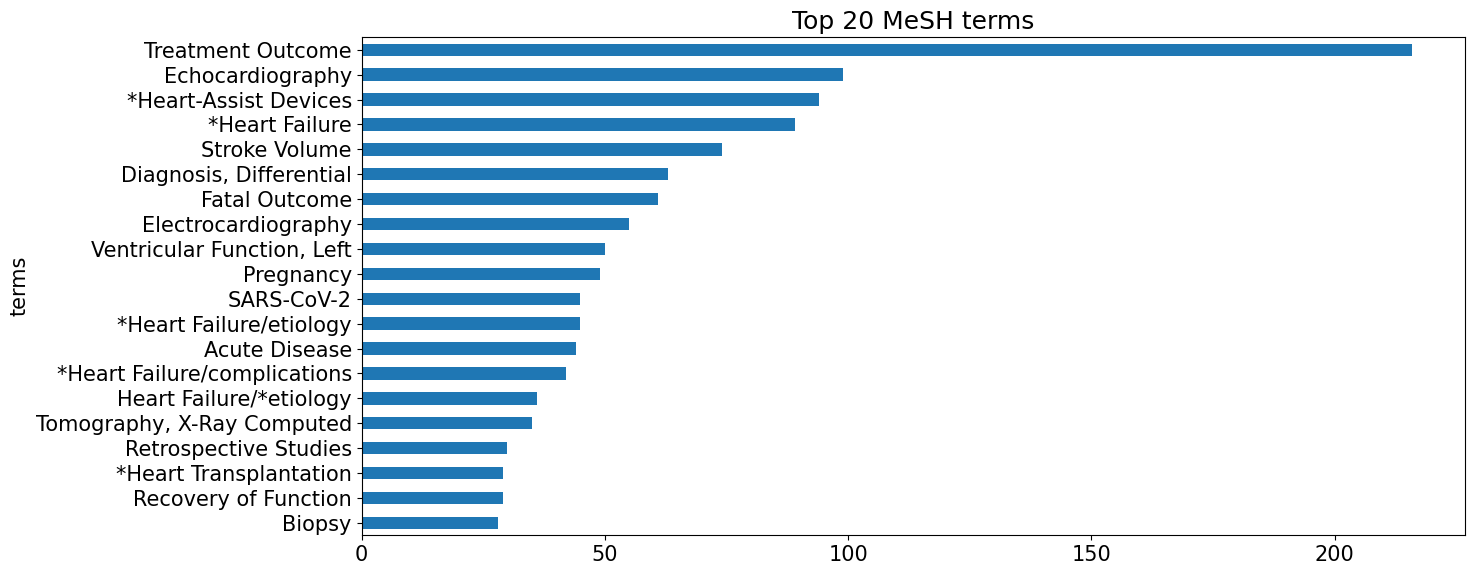

In [29]:
df_meta_medic.terms.value_counts().sort_values(ascending=True).tail(20).plot(kind="barh", figsize=(15, 6), title="Top 20 MeSH terms")
plt.tight_layout()
plt.savefig("img/data_analysis/mesh_terms_medic.png")

## Gender and age

### Gender

In [8]:
df_meta_list = df_meta.groupby("filename").apply(lambda x: x["terms"].tolist(), include_groups=False).reset_index().rename(columns={0: "mesh_terms"})
df_meta_list = df_meta_list.merge(df, on="filename")
print(df_meta_list.head())

import re
df_meta_list["male"] = df_meta_list["mesh_terms"].apply(lambda x: "Male" in x)
df_meta_list["female"] = df_meta_list["mesh_terms"].apply(lambda x: "Female" in x)

mask_gender_null = (df_meta_list["male"].astype(int) + df_meta_list["female"].astype(int)) != 1

pattern_male = r"\b[mM]ale\b|\b[mM]an\b|\b[bB]oy\b|\b[mM]en\b|\b[gG]entleman\b"
pattern_female = r"\b[Ff]emale\b|\b[wW]oman\b|\b[gG]irl\b|\b[lL]ady\b|\b[wW]omen\b"

df_meta_list["first_match"] = df_meta_list["text"].apply(lambda x: re.findall(pattern_male + "|" + pattern_female, x))
df_meta_list["first_match"] = df_meta_list["first_match"].apply(lambda x: x[0] if len(x) > 0 else None)

df_meta_list.loc[mask_gender_null, "male"] = df_meta_list.loc[mask_gender_null, "first_match"].apply(lambda x: bool(re.match(pattern_male, x)) if x is not None else False)
df_meta_list.loc[mask_gender_null, "female"] = df_meta_list.loc[mask_gender_null, "first_match"].apply(lambda x: bool(re.match(pattern_female, x)) if x is not None else False) 

# df_meta_list.loc[~ (df_meta_list["male"] | df_meta_list["female"])]
def get_gender(x):
    if x["male"] & (not x["female"]):
        return "Male"
    elif x["female"] & (not x["male"]):
        return "Female"
    else:
        return "Unknown"
    
df_meta_list["gender"] = df_meta_list.apply(get_gender, axis=1)

df_meta_list = df_meta_list.drop(columns=["male", "female", "first_match"])

df_meta_list["gender"].value_counts()

       filename                                         mesh_terms  \
0  25350173.txt  [Cardiac Surgical Procedures/*methods, Female,...   
1  25531204.txt  [Adult, Anti-Inflammatory Agents, Non-Steroida...   
2  25654384.txt  [Animals, *Black Widow Spider, Female, Greece,...   
3  25679083.txt  [Acute Disease, Aged, Cardiovascular Agents/*t...   
4  25725033.txt  [Acute Disease, Aged, 80 and over, Constrictio...   

                                                text  
0  A 64-year-old female lifelong smoker with no p...  
1  A 28-year-old man presented to the Emergency D...  
2  A 64-year-old female patient with a history of...  
3  Josephine was a 70-year-old white woman measur...  
4  An 85-year-old woman reported sudden onset dys...  


gender
Male       562
Female     424
Unknown     14
Name: count, dtype: int64

In [9]:
df_meta_list[df_meta_list.gender == "Unknown"]

,filename,mesh_terms,text,gender
403,32470181.txt,"[*Betacoronavirus, COVID-19, Coronavirus Infec...","Briefly, the patient was admitted on January 2...",Unknown
435,32729665.txt,"[Aortic Valve/diagnostic imaging/surgery, *Hea...","During this period, 11 (11%) patients received...",Unknown
569,33862215.txt,"[COVID-19/*complications, Heart Failure/etiolo...","A 50-year-old patient, six years post-heart tr...",Unknown
582,34035020.txt,"[*Heart Failure, Humans, Infant, *Ventricular ...",A 5-month-old infant with poor weight gain was...,Unknown
641,34624371.txt,"[Child, *Heart Failure/complications, Humans, ...",This 6-year-old child was admitted to the hosp...,Unknown
681,34962097_2.txt,"[*Heart Failure/complications/drug therapy, Hu...",A 50‐year‐old patient was admitted to the ICCU...,Unknown
697,35075099.txt,"[Activities of Daily Living, *Cardiomyopathies...",A 53-year-old previously healthy patient witho...,Unknown
764,35818131.txt,"[Infant, Humans, *Aortic Coarctation/complicat...",The 11‐month‐old infant was admitted to our ho...,Unknown
815,36345681.txt,"[Humans, *Heart-Assist Devices/adverse effects...",A 53‐year‐old African American with Class 1 ob...,Unknown
874,37186429.txt,"[Humans, *Barth Syndrome/genetics/pathology, *...",The patient was born via spontaneous delivery ...,Unknown


### Age

In [10]:
d_ages = {
            "Newborn": "birth-1 month",
            "Infant": "A - 1 year",
            "Preschool Child": "B - 2-5 years",
            "Child": "C - 6-12 years",
            "Adolescent": "D - 13-18 years",
            "Young Adult": "E - 19-24 years",
            "Adult": "F - 19-44 years",
            "Middle Aged": "G - 45-64 years",
            "Aged": "H - 65+ years",
            "Aged, 80 and over": "I - 80+ years"}


def filter_preferences(ls_ages):
    for i in range(len(d_ages)):
        if list(d_ages.keys())[i] in ls_ages:
            return [list(d_ages.keys())[i]]
    return []

def bucket_age(x):
    if x is None:
        return None
    x = int(x)
    if x < 1:
        return "Newborn"
    elif x < 2:
        return "Infant"
    elif x < 6:
        return "Preschool Child"
    elif x < 13:
        return "Child"
    elif x < 19:
        return "Adolescent"
    elif x < 25:
        return "Young Adult"
    elif x < 45:
        return "Adult"
    elif x < 65:
        return "Middle Aged"
    elif x < 80:
        return "Aged"
    else:
        return "Aged, 80 and over"

df_meta_list.loc[:, "age"] = df_meta_list.loc[:, "text"].apply(lambda x: re.findall(r"(\d+)\W+year|(\d+).year.old", x)).apply(lambda x: x[0][0] if len(x) > 0 else None).values

df_meta_list["age_desc"] = df_meta_list["mesh_terms"].apply(filter_preferences)
df_meta_list["desc_len"] = df_meta_list["age_desc"].str.len()

df_meta_list["age_group"] = df_meta_list["age"].apply(bucket_age)
df_meta_list.loc[df_meta_list["age_group"].isnull(), "age_group"] = df_meta_list.loc[df_meta_list["age_group"].isnull(), "age_desc"].apply(lambda x: x[0] if len(x) > 0 else "Unknown")

df_meta_list["age_group"] = df_meta_list["age_group"].map(d_ages).fillna("Unknown")

df_meta_list["age_group"].value_counts()


age_group
G - 45-64 years    322
H - 65+ years      241
F - 19-44 years    211
I - 80+ years       73
E - 19-24 years     44
D - 13-18 years     32
C - 6-12 years      27
A - 1 year          20
B - 2-5 years       16
Unknown             14
Name: count, dtype: int64

In [11]:
df_plot_gender = df_meta_list.groupby("gender")["age_group"].value_counts().unstack().T.sort_index(ascending=True).fillna(0)
df_plot_gender.index = df_plot_gender.index.str.split(" - ").str[1].fillna("Unknown")
df_plot_gender

gender,Female,Male,Unknown
age_group,,,
1 year,5.0,13.0,2.0
2-5 years,10.0,4.0,2.0
6-12 years,11.0,15.0,1.0
13-18 years,13.0,19.0,0.0
19-24 years,21.0,23.0,0.0
19-44 years,109.0,102.0,0.0
45-64 years,129.0,189.0,4.0
65+ years,89.0,151.0,1.0
80+ years,32.0,41.0,0.0


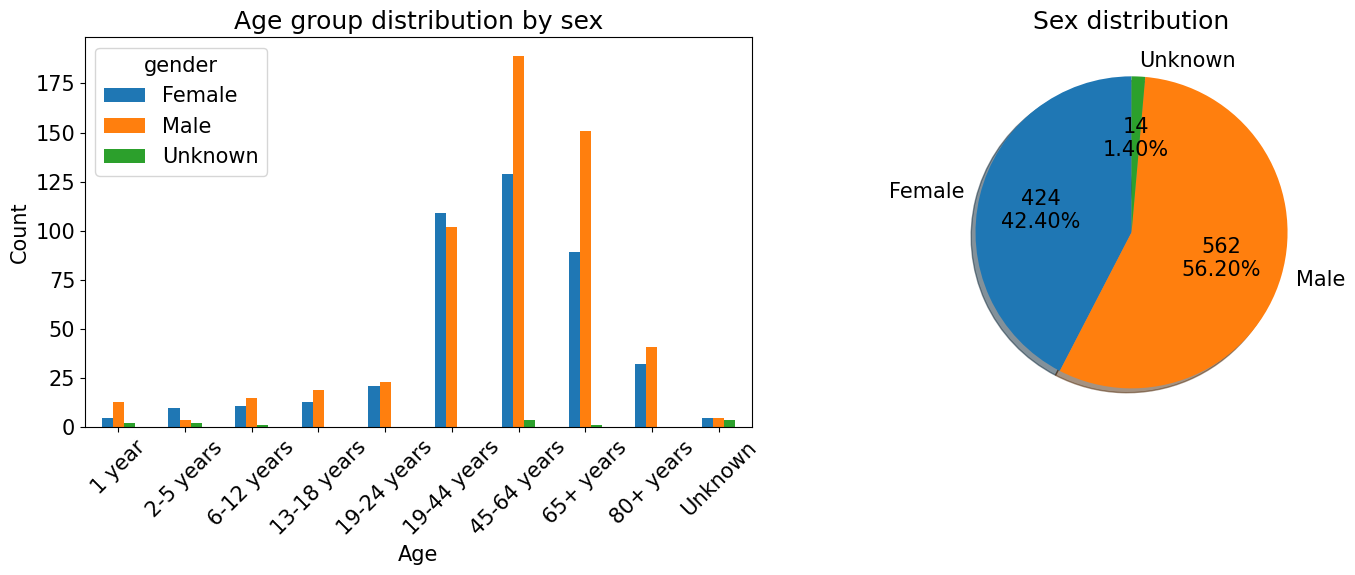

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use a predefined Seaborn palette
# sns.set_palette("deep")
# Increase font size
# sns.set(font_scale=1.5)

plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Create the bar plot for age group distribution by gender
bar_plot = df_plot_gender.plot(kind="bar", stacked=False, 
                               title="Age group distribution by sex", ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Count")

# Annotate each bar with its absolute value
# for container in ax[0].containers:
#     ax[0].bar_label(container, label_type='edge')  # This will display the numeric value on top of each bar

# For the pie chart, define a custom function to show absolute counts
totals = df_plot_gender.sum()

def absolute_value_autopct(pct):
    total = totals.sum()
    absolute = int(round(pct/100. * total))
    return f"{absolute}\n{pct:.2f}%"

totals.plot(kind="pie", autopct=absolute_value_autopct, 
            title="Sex distribution", ax=ax[1], startangle=90, shadow=True, radius=1)


plt.tight_layout()
plt.savefig("img/data_analysis/group-gender.png")
plt.show()
